In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
TF_FORCE_GPU_ALLOW_GROWTH = True

Num GPUs Available:  2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10] 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

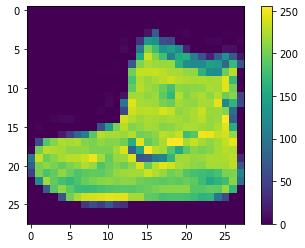

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0 #we divide the images by 255 to make our image 
                                    #values on a scale between 0-255 go to 0-1

test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=50)  # we pass the data, labels and epochs and watch the magic!

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4993 - accuracy: 0.8238
Epoch 2/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3751 - accuracy: 0.8643
Epoch 3/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3361 - accuracy: 0.8781
Epoch 4/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3130 - accuracy: 0.8846
Epoch 5/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2944 - accuracy: 0.8920
Epoch 6/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2789 - accuracy: 0.8957
Epoch 7/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2658 - accuracy: 0.9011
Epoch 8/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2543 - accuracy: 0.9044
Epoch 9/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2448 - accuracy: 0.9097
Epoch 10/50
60

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.5175 - accuracy: 0.8833
Test accuracy: 0.8833


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.4301237e-16, 1.2724519e-19, 1.5856178e-18, 1.6951249e-21,
       1.2656651e-26, 3.1140895e-11, 1.7069009e-15, 2.5072269e-09,
       3.4892877e-17, 1.0000000e+00], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

Pick a number: 1


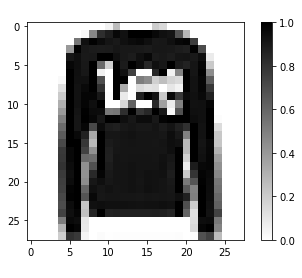

In [17]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
        if 0 <= num <= 1000:
            return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)